In [2]:
import numpy as np
import json

In [233]:
MAX_STEP = 50
def parse_test_result(result_path):
    policy_result = {}
    with open(result_path, 'r') as f:
    
        lines = f.readlines()
        for line in lines:
            line = line.split(" ")
            world = "world_%s" %(line[0])
            log = policy_result.get(world, {'ep_return': [], 'ep_length': [], 'succeed': []})
            if int(line[3]):
                log['ep_length'].append(int(line[1]))
            else:
                log['ep_length'].append(MAX_STEP)
            log['ep_return'].append(float(line[2]))
            log['succeed'].append(int(line[3]))
    
            policy_result[world] = log
    return policy_result

def load_test_result(result_path):
    with open(result_path, 'r') as f:
        policy_result = json.load(f)
    for k in policy_result.keys():
        policy_result[k]["ep_length"] = [2*policy_result[k]["ep_length"][i]\
                                         if policy_result[k]["succeed"][i] else MAX_STEP\
                                         for i in range(len(policy_result[k]["ep_length"]))]
    return policy_result

In [192]:
def report_test(policy_result, keys=None, verbose=False):
    dic = {"ep_length": [], "ep_return": [], "succeed": [], "world": [], "std": [], "len": []}
    for k in sorted(policy_result.keys()):
        s = "%s:\t" %(str(k))
        if keys is None or k in keys:
            for wk in policy_result[k].keys():
                dic[wk].append(np.mean(policy_result[k][wk]))
                s += "%s: %.2f\t" %(wk, np.mean(policy_result[k][wk]))
                if wk == "ep_length":
                    dic["std"].append(np.var(policy_result[k][wk]))
                    dic["len"].append(len(policy_result[k][wk]))
            dic["world"].append(int(k.split("_")[-1].split(".")[0]))
            if verbose:
                print(s)
    print("average:\t ep_return: %.2f\t ep_length: %.2f\t succeed: %.4f" \
          %(np.mean(dic["ep_return"]), np.mean(dic["ep_length"]), np.mean(dic["succeed"])))
    return dic

# Statistic Report

In [11]:
policy_result_path = '../sac/results/SAC_2020_12_19_22_31/test_result.txt'
default_result_path = 'default_t20_train_cleaned.json'

policy_result = parse_test_result(policy_result_path)
default_result = load_test_result(default_result_path)
report_test(policy_result)
report_test(default_result, keys=policy_result.keys())

average:	 ep_return: 12.83	 ep_length: 14.07	 succeed: 0.98
average:	 ep_return: 9.43	 ep_length: 29.46	 succeed: 0.96


{'ep_length': [28.15, 30.9, 28.65, 28.0, 29.75, 32.5, 28.6, 27.6, 32.9, 27.6],
 'ep_return': [23.888671418872047,
  20.829697607781917,
  23.024684480254123,
  0.011228009650672055,
  21.374982734902428,
  0.011249997882812978,
  -22.276221166644383,
  12.559459586589636,
  14.855690134981643,
  0.011196424324865584],
 'succeed': [1.0, 0.95, 1.0, 1.0, 1.0, 0.9, 1.0, 0.85, 0.85, 1.0],
 'world': [140, 142, 157, 185, 187, 235, 271, 288, 45, 83]}

In [19]:
policy_result_path = '../sac/results/SAC_2020_12_20_15_44/test_result.txt'
default_result_path = 'default_t20_train_cleaned.json'

policy_result = parse_test_result(policy_result_path)
default_result = load_test_result(default_result_path)
report_test(policy_result)
print('\n\n')
report_test(default_result, keys=policy_result.keys())

world_140:	ep_return: 11.54	ep_length: 31.70	succeed: 0.95	
world_142:	ep_return: 8.51	ep_length: 25.85	succeed: 0.95	
world_157:	ep_return: 12.40	ep_length: 29.05	succeed: 1.00	
world_185:	ep_return: 12.64	ep_length: 22.05	succeed: 1.00	
world_187:	ep_return: 12.46	ep_length: 25.55	succeed: 1.00	
world_235:	ep_return: 12.65	ep_length: 24.65	succeed: 1.00	
world_271:	ep_return: 10.12	ep_length: 36.95	succeed: 0.85	
world_288:	ep_return: 11.79	ep_length: 29.00	succeed: 0.95	
world_45:	ep_return: 6.20	ep_length: 26.85	succeed: 1.00	
world_83:	ep_return: 6.50	ep_length: 21.15	succeed: 1.00	
average:	 ep_return: 10.48	 ep_length: 27.28	 succeed: 0.97



world_140:	ep_return: 23.89	ep_length: 28.15	succeed: 1.00	
world_142:	ep_return: 20.83	ep_length: 30.90	succeed: 0.95	
world_157:	ep_return: 23.02	ep_length: 28.65	succeed: 1.00	
world_185:	ep_return: 0.01	ep_length: 28.00	succeed: 1.00	
world_187:	ep_return: 21.37	ep_length: 29.75	succeed: 1.00	
world_235:	ep_return: 0.01	ep_length: 32.50

In [6]:
policy_result_path = '../continuous/results/TD3_testbed_2020_12_26_20_50/test_result.txt'
default_result_path = 'default_train.txt'

policy_result = parse_test_result(policy_result_path)
default_result = parse_test_result(default_result_path)
# default_result = load_test_result(default_result_path)
_ = report_test(policy_result)
_ = report_test(default_result, keys=policy_result.keys())

average:	 ep_return: 9.62	 ep_length: 27.15	 succeed: 0.9092
average:	 ep_return: 10.62	 ep_length: 28.57	 succeed: 0.9412


In [9]:
pretrain_result_path = "pretrain_test.txt"
result = parse_test_result(pretrain_result_path)
_ = report_test(result)

average:	 ep_return: 9.39	 ep_length: 30.27	 succeed: 0.8940


In [181]:
# 50 test world default parameters
pretrain_result_path = "default_test.txt"
result = parse_test_result(pretrain_result_path)
_ = report_test(result)

pretrain_result_path = "../continuous/results/TD3_2021_01_03_15_44/test_result.txt"
result = parse_test_result(pretrain_result_path)
_ = report_test(result)

average:	 ep_return: 10.42	 ep_length: 33.94	 succeed: 0.9280
average:	 ep_return: 8.11	 ep_length: 30.31	 succeed: 0.8980


In [223]:
policy_result_path = '../sac/results/SAC_2020_12_20_21_20/test_result.txt'
default_result_path = 'default_train.txt'

policy_result = parse_test_result(policy_result_path)
default_result = parse_test_result(default_result_path)
# default_result = load_test_result(default_result_path)
_ = report_test(policy_result)
_ = report_test(default_result, keys=policy_result.keys())

average:	 ep_return: 10.67	 ep_length: 28.85	 succeed: 0.9344
average:	 ep_return: 10.62	 ep_length: 31.51	 succeed: 0.9412


In [224]:
# 50 test world default parameters
pretrain_result_path = "default_test.txt"
result = parse_test_result(pretrain_result_path)
_ = report_test(result)

pretrain_result_path = '../sac/results/SAC_2020_12_20_21_20/test.txt'
result = parse_test_result(pretrain_result_path)
_ = report_test(result)

average:	 ep_return: 10.42	 ep_length: 33.94	 succeed: 0.9280
average:	 ep_return: 10.08	 ep_length: 29.43	 succeed: 0.9340


In [225]:
# 50 test world default parameters
pretrain_result_path = "default_train.txt"
result = parse_test_result(pretrain_result_path)
_ = report_test(result)

pretrain_result_path = 'TD3_testbed_2020_10_25_09_23_p15_t20_train.json'
result = load_test_result(pretrain_result_path)
a = report_test(result)

average:	 ep_return: 10.62	 ep_length: 31.51	 succeed: 0.9412
average:	 ep_return: -25.18	 ep_length: 28.91	 succeed: 0.9147


In [226]:
# 50 test world default parameters
pretrain_result_path = "default_test.txt"
result = parse_test_result(pretrain_result_path)
_ = report_test(result)

pretrain_result_path = 'TD3_testbed_2020_10_25_09_23_p15_t20_test.json'
result = load_test_result(pretrain_result_path)
_ = report_test(result)

average:	 ep_return: 10.42	 ep_length: 33.94	 succeed: 0.9280
average:	 ep_return: -26.93	 ep_length: 30.45	 succeed: 0.8927


# Scatter Plot

In [204]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

sns.set(style="whitegrid", font_scale=3.5)
default_result_path = 'default_train.txt'
default_result = parse_test_result(default_result_path)
report = report_test(default_result)
idx = np.argsort(report["ep_length"])
ORDERED_TRAIN = list(np.array(report["world"])[idx])

average:	 ep_return: 10.62	 ep_length: 31.51	 succeed: 0.9412


average:	 ep_return: 10.67	 ep_length: 28.85	 succeed: 0.9344
average:	 ep_return: 10.62	 ep_length: 31.51	 succeed: 0.9412


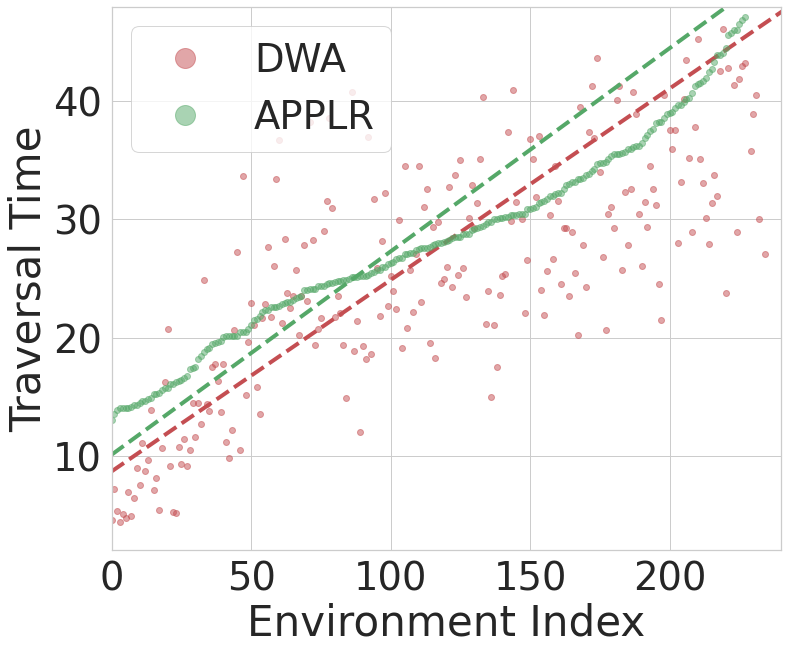

In [205]:
def plot_with_fit_sorted(policy_result, c = 'r', poly = 1):
    report = report_test(policy_result)
    x = []
    t = []
    for i, w in enumerate(ORDERED_TRAIN):
        if w in report["world"]:
            index = report["world"].index(w)
            x.append(i)
            t.append(report["ep_length"][index])
            
    coef = np.polyfit(x, t, poly)
    poly1d_fn = np.poly1d(coef) 
    data = pd.DataFrame({'idx': x, 'time': t})
    plt.plot(x, t, 'yo', c=c, alpha=0.5, markersize=6)
    plt.plot(x, poly1d_fn(x), '--k', c=c, alpha=1, linewidth = 4, label='_nolegend_')
    
    
policy_result_path = '../sac/results/SAC_2020_12_20_21_20/test_result.txt'
default_result_path = 'default_train.txt'

policy_result = parse_test_result(policy_result_path)
default_result = parse_test_result(default_result_path)

plt.figure(figsize=(12,10))
plot_with_fit_sorted(policy_result, c='r', poly=1)
plot_with_fit_sorted(default_result, c='g', poly=1)
plt.xlabel('Environment Index')
plt.ylabel('Traversal Time')
lgnd = plt.legend(['DWA', 'APPLR'], loc=2)
lgnd.legendHandles[0]._legmarker.set_markersize(20)
lgnd.legendHandles[1]._legmarker.set_markersize(20)
plt.xlim([-0, 240])
plt.ylim([2, 48])
plt.show()

average:	 ep_return: -25.18	 ep_length: 28.91	 succeed: 0.9147
average:	 ep_return: 10.62	 ep_length: 31.51	 succeed: 0.9412


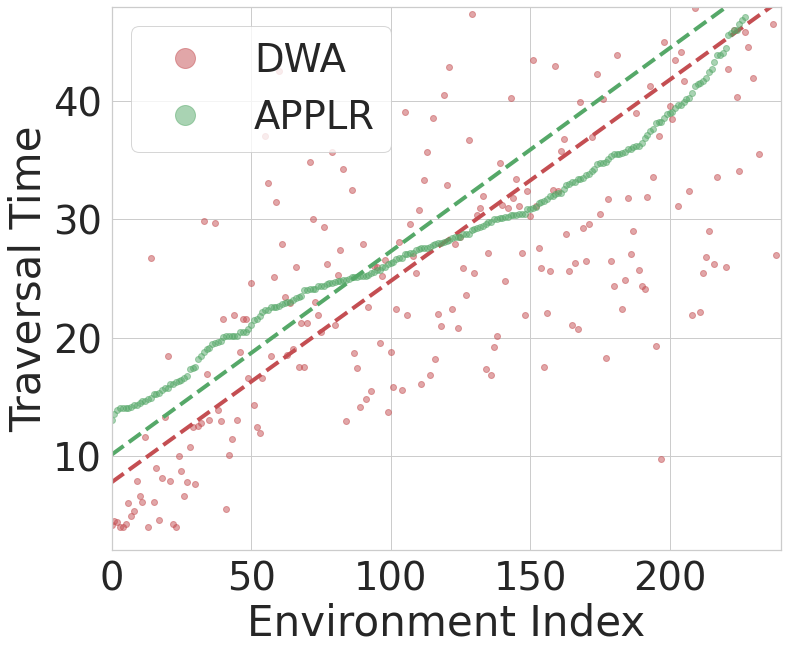

In [206]:
def plot_with_fit_sorted(policy_result, c = 'r', poly = 1):
    report = report_test(policy_result)
    x = []
    t = []
    for i, w in enumerate(ORDERED_TRAIN):
        if w in report["world"]:
            index = report["world"].index(w)
            x.append(i)
            t.append(report["ep_length"][index])
            
    coef = np.polyfit(x, t, poly)
    poly1d_fn = np.poly1d(coef) 
    data = pd.DataFrame({'idx': x, 'time': t})
    plt.plot(x, t, 'yo', c=c, alpha=0.5, markersize=6)
    plt.plot(x, poly1d_fn(x), '--k', c=c, alpha=1, linewidth = 4, label='_nolegend_')
    

default_result_path = 'default_train.txt'
pretrain_result_path = 'TD3_testbed_2020_10_25_09_23_p15_t20_train.json'

policy_result = load_test_result(pretrain_result_path)
default_result = parse_test_result(default_result_path)

plt.figure(figsize=(12,10))
plot_with_fit_sorted(policy_result, c='r', poly=1)
plot_with_fit_sorted(default_result, c='g', poly=1)
plt.xlabel('Environment Index')
plt.ylabel('Traversal Time')
lgnd = plt.legend(['DWA', 'APPLR'], loc=2)
lgnd.legendHandles[0]._legmarker.set_markersize(20)
lgnd.legendHandles[1]._legmarker.set_markersize(20)
plt.xlim([-0, 240])
plt.ylim([2, 48])
plt.show()

In [239]:
def bar_plot(policy_result1, policy_result2, figsize=(60,20)):
    alpha = 0.05
    report1 = report_test(policy_result1)
    report2 = report_test(policy_result2)
    for w, e, s, l in zip(report2["world"], report2["ep_length"], report2["std"], report2["len"]):
        if w not in report1["world"]:
            print(w)
            report1["world"].append(w)
            report1["ep_length"].append(e)
            report1["std"].append(s)
            report1["len"].append(l)
    worlds = sorted(report1["world"])
    idx1, idx2 = np.argsort(report1["world"]), np.argsort(report2["world"])
    
    ep1 = np.array(report1["ep_length"])[idx1]
    ep2 = np.array(report2["ep_length"])[idx2]
    var1 = np.array(report1["std"])[idx1]
    var2 = np.array(report2["std"])[idx2]
    len1 = np.array(report1["len"])[idx1]
    len2 = np.array(report2["len"])[idx2]
    pec_diff = (ep1-ep2)/ep2
    t_value = (ep1 - ep2) / np.sqrt(var1 / len1 + var2 / len2)               
    dof = (var1 / len1 + var2 / len2) ** 2 / ((var1 / len1) ** 2 / (len1 - 1) + (var2 / len2) ** 2 / (len2 - 1))
    t_critical = stats.t.ppf(1 - alpha / 2, dof)
    t_test = np.abs(t_value) > t_critical
    
    data = pd.DataFrame({'worlds': worlds, 'relative difference': pec_diff, "T_test": t_test})
    plt.figure(figsize=figsize)
    sns.barplot(x='worlds', y='relative difference', hue="T_test", data=data, color="darkblue")
    frame = plt.gca()
    frame.axes.get_xaxis().set_ticks([])
    plt.show()
    
    # sort by the percentage difference
    idx = np.argsort(pec_diff)
    pec_diff = pec_diff[idx]
    t_test = t_test[idx]
    # worlds = worlds[idx]
    
    data = pd.DataFrame({'worlds': worlds, 'relative difference': pec_diff, "T_test": t_test})
    plt.figure(figsize=figsize)
    sns.barplot(x='worlds', y='relative difference', hue="T_test", data=data, color="darkblue")#, palette=['lightsteelblue', 'darkblue'])
    frame = plt.gca()
    frame.axes.get_xaxis().set_ticks([])
    plt.show()

average:	 ep_return: 10.67	 ep_length: 25.57	 succeed: 0.9344
average:	 ep_return: 10.62	 ep_length: 28.57	 succeed: 0.9412


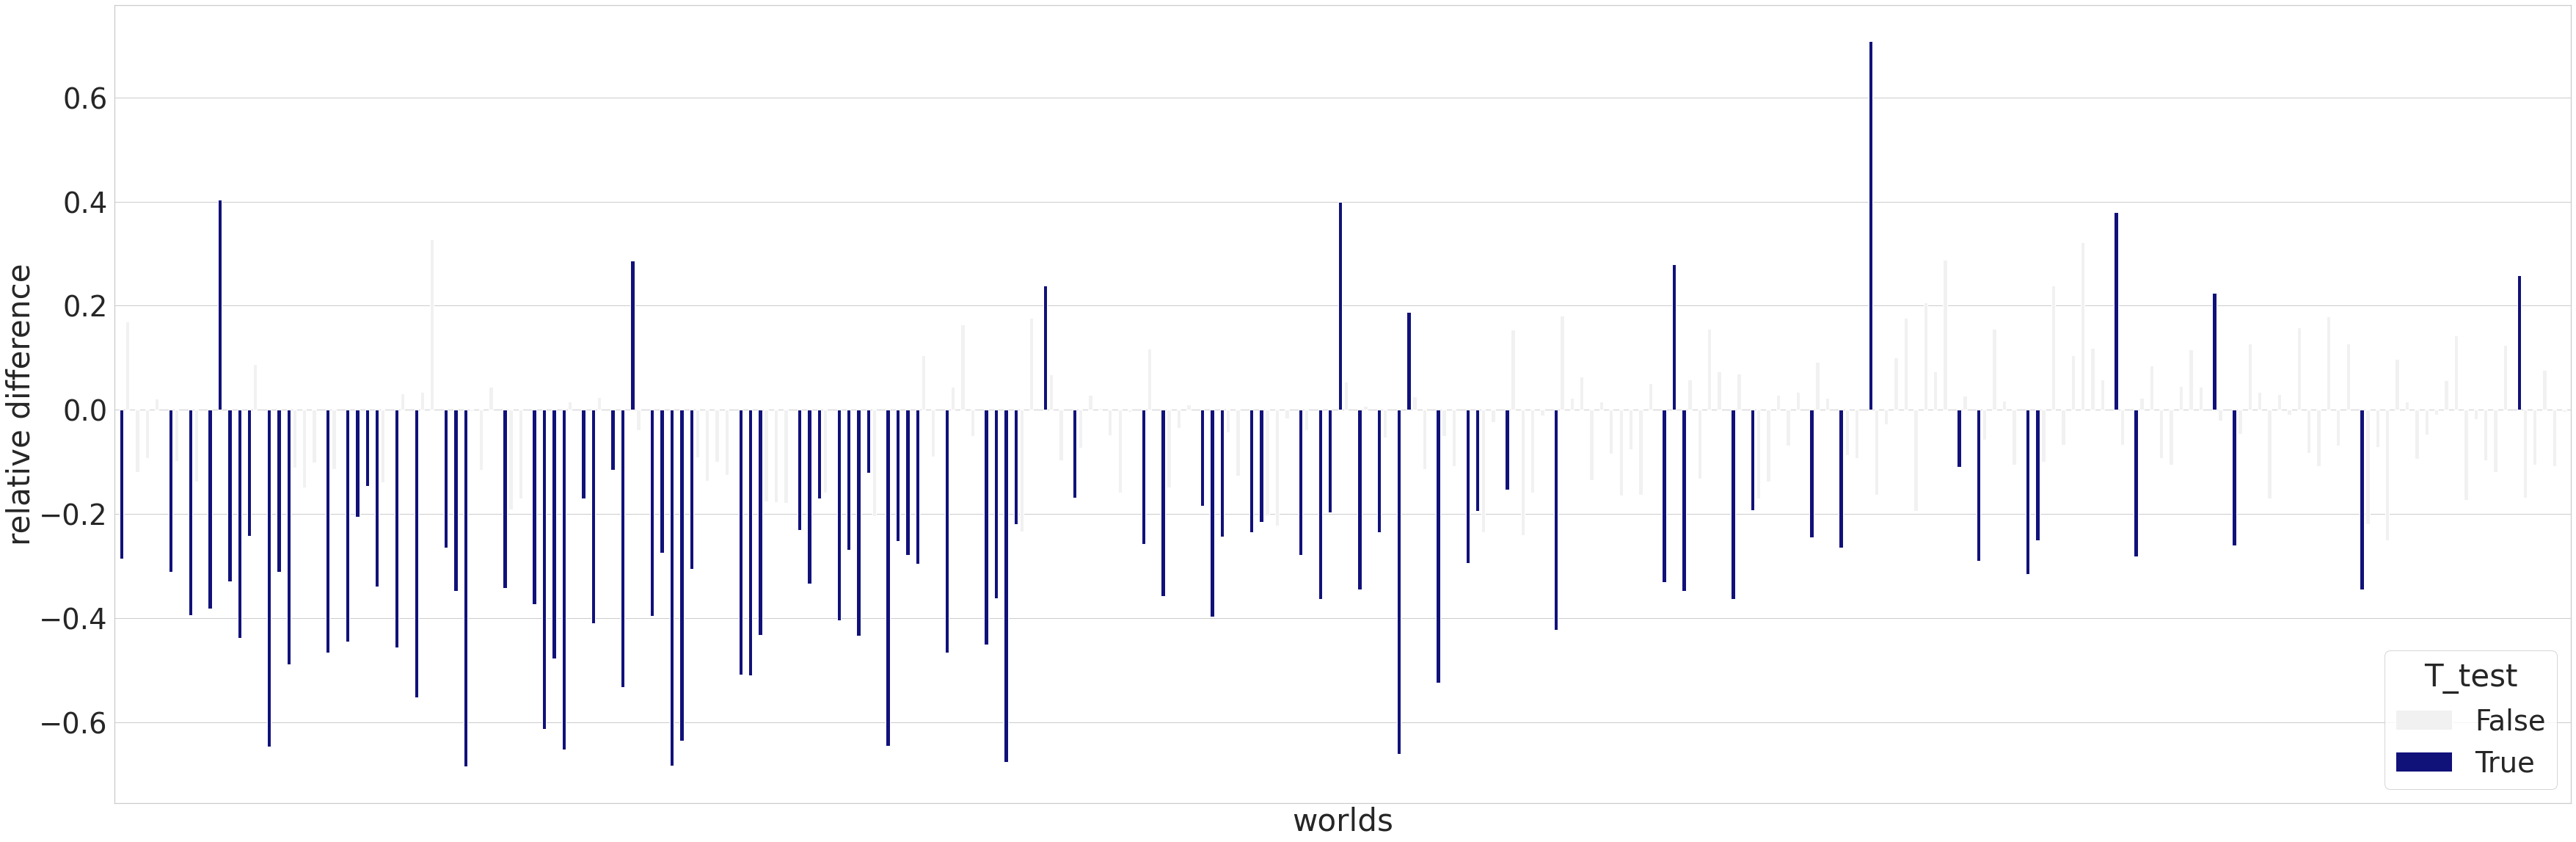

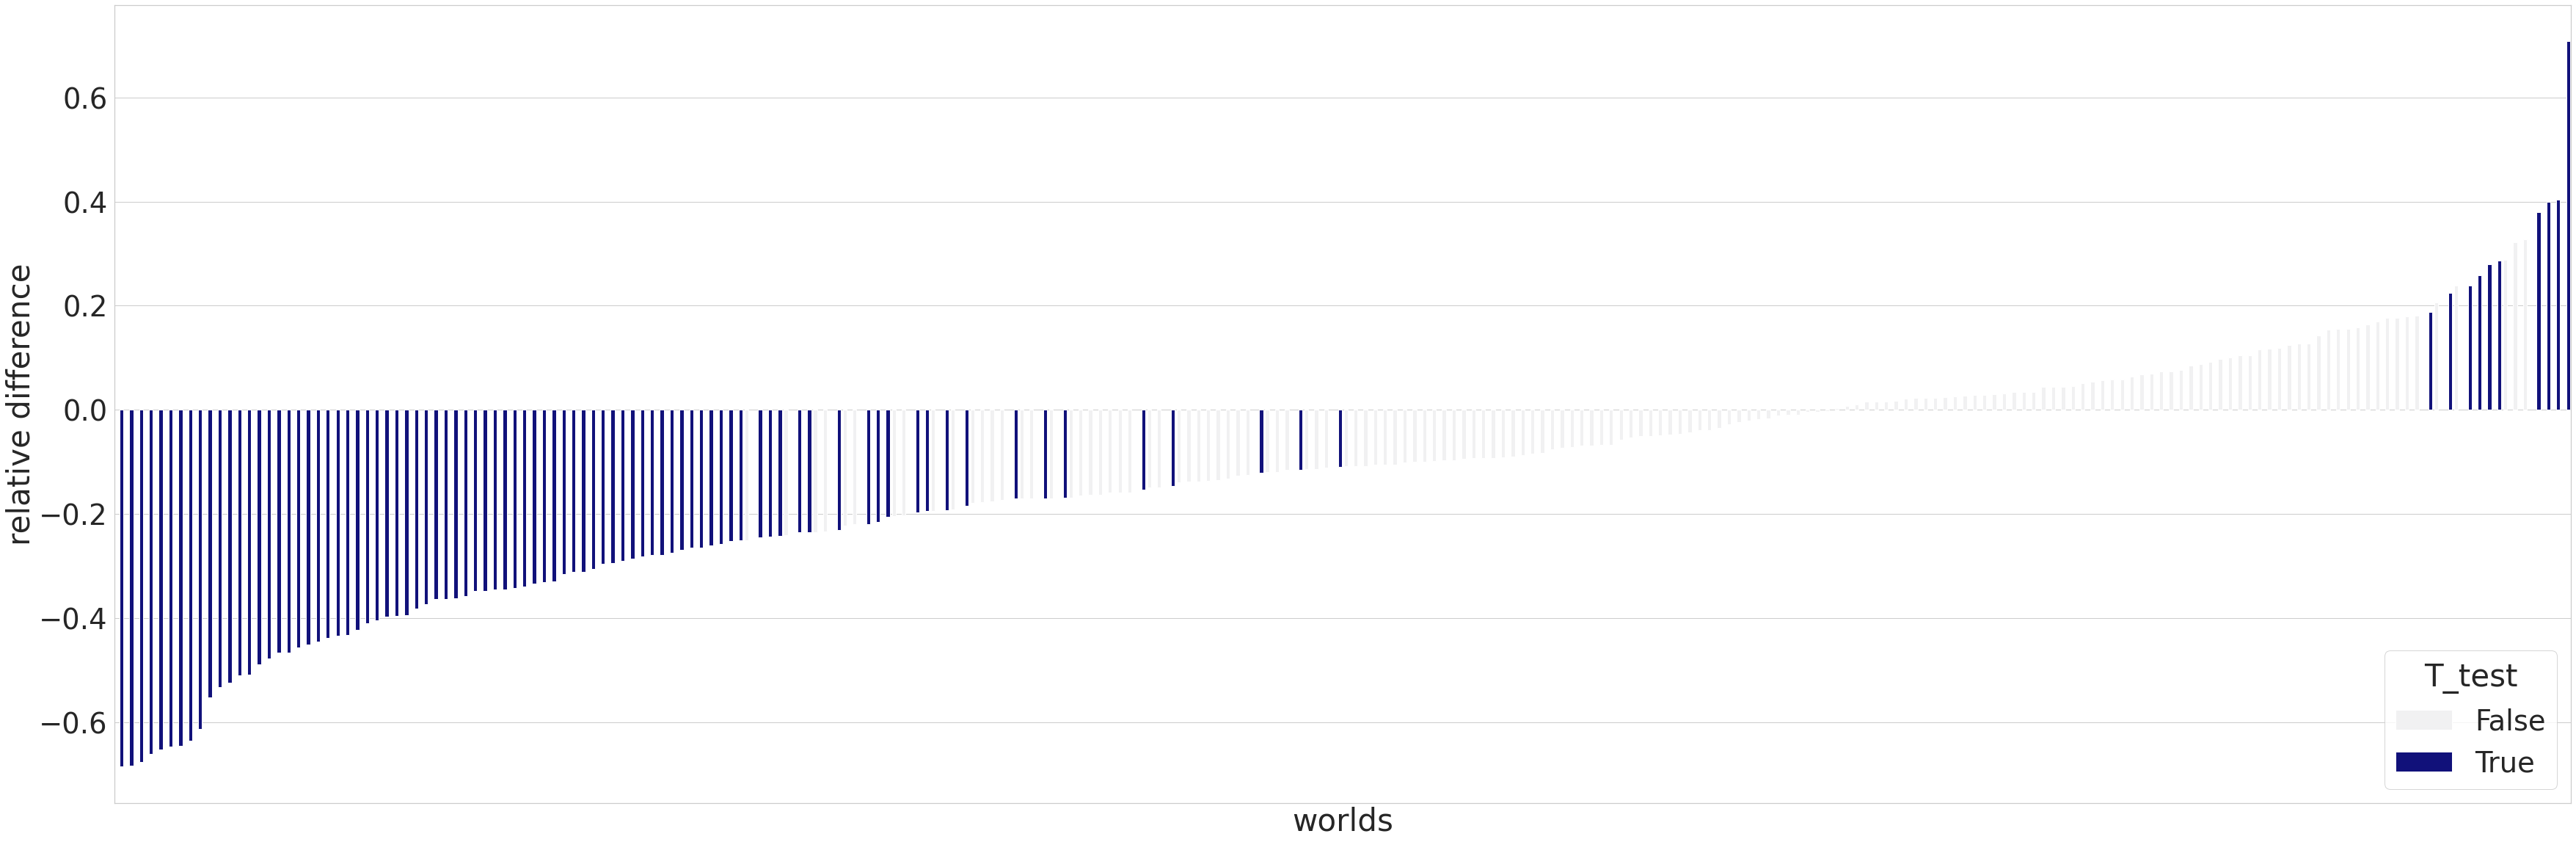

In [240]:
policy_result_path = '../sac/results/SAC_2020_12_20_21_20/test_result.txt'
default_result_path = 'default_train.txt'

policy_result = parse_test_result(policy_result_path)
default_result = parse_test_result(default_result_path)

bar_plot(policy_result, default_result)

average:	 ep_return: 10.08	 ep_length: 26.12	 succeed: 0.9340
average:	 ep_return: 10.42	 ep_length: 30.34	 succeed: 0.9280


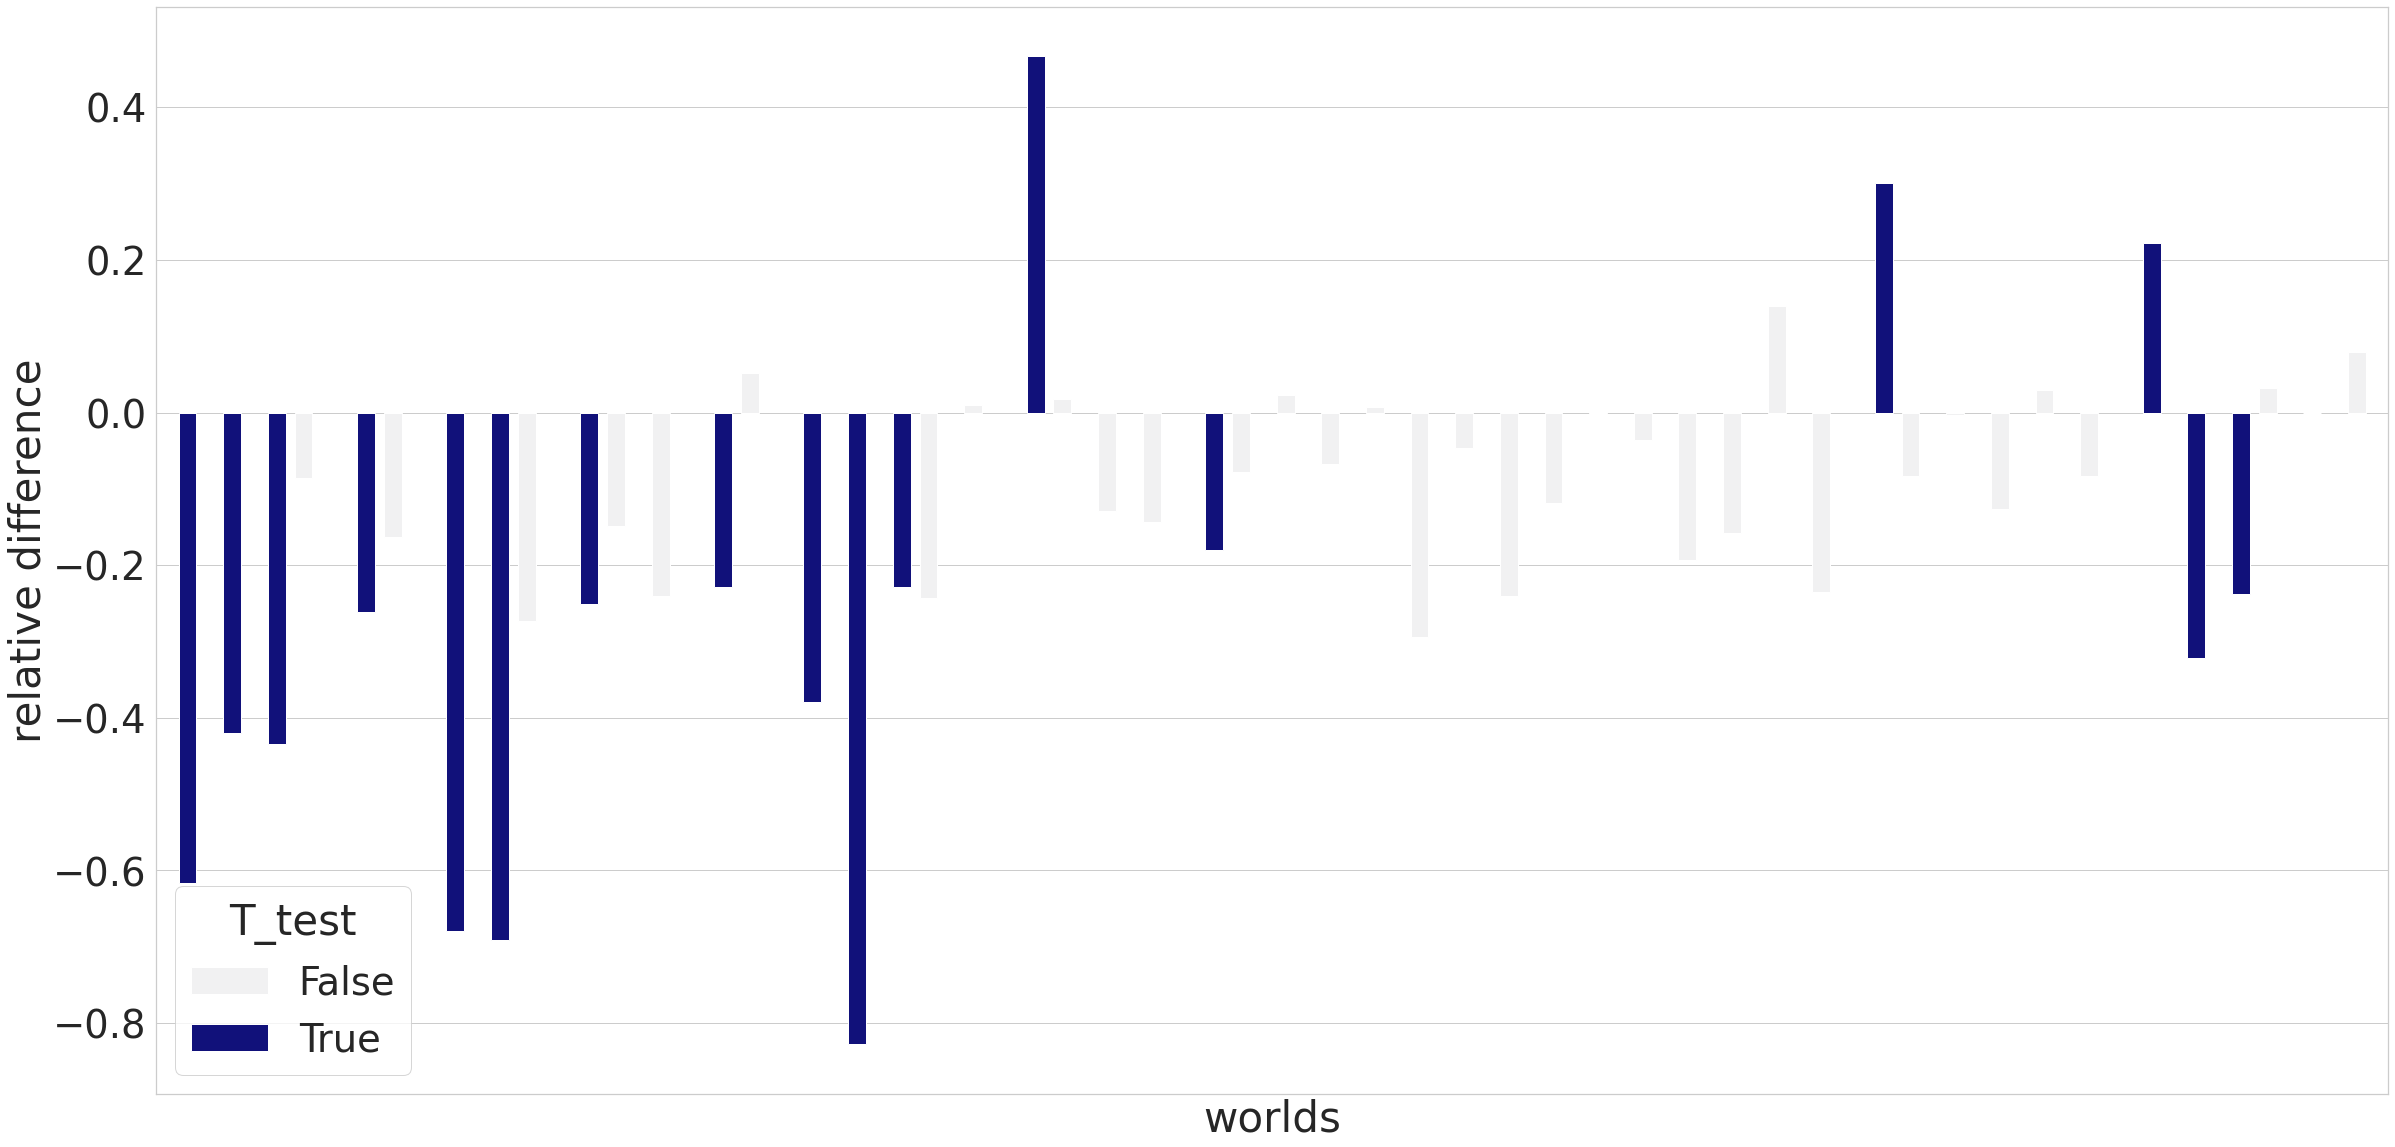

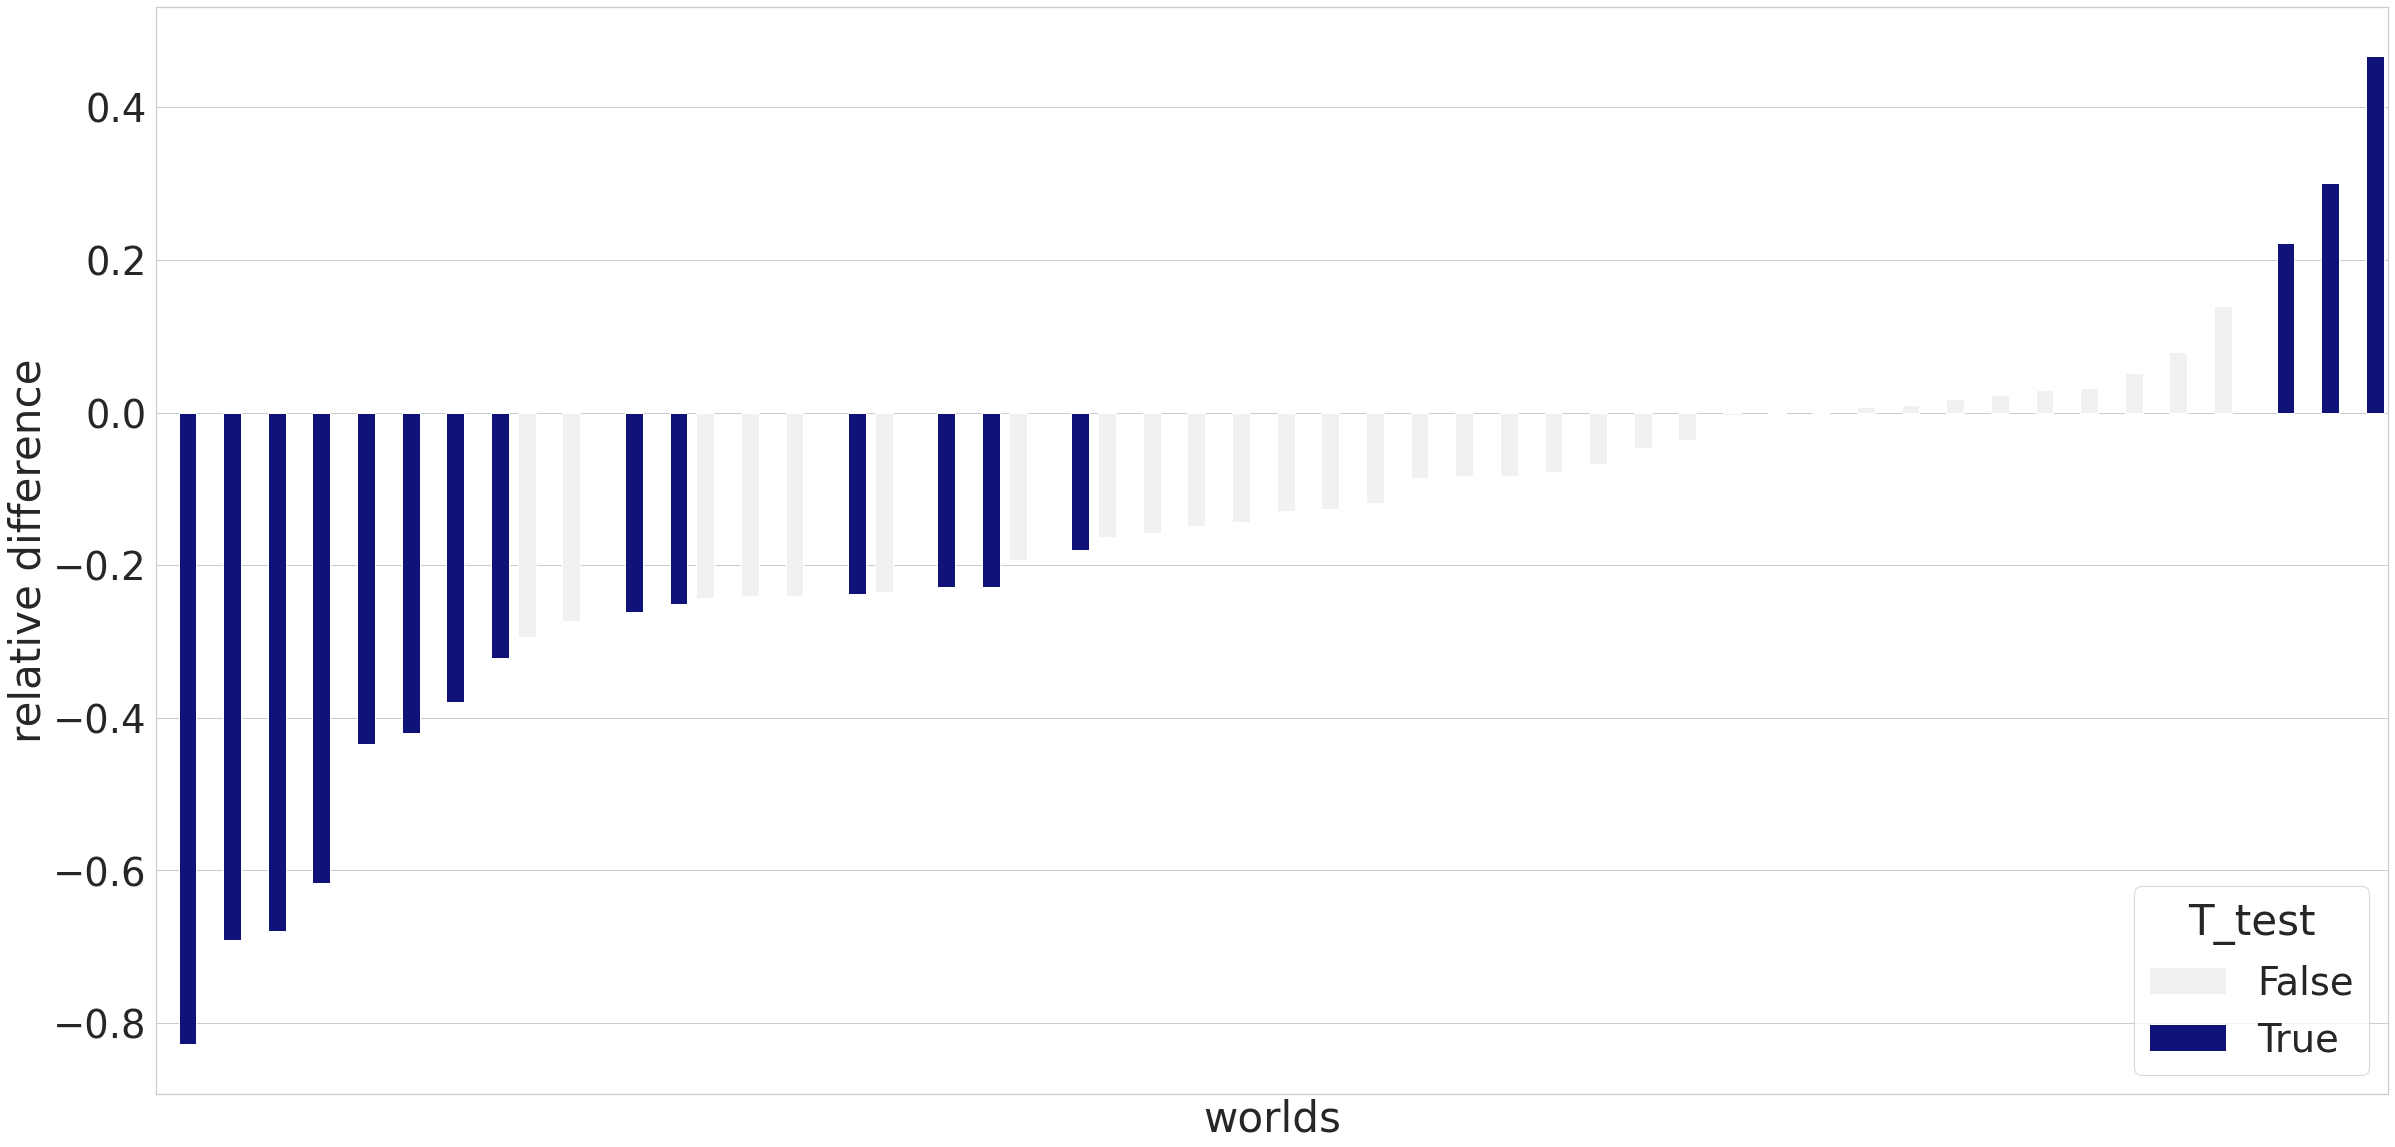

In [241]:
policy_result_path = '../sac/results/SAC_2020_12_20_21_20/test.txt'
default_result_path = 'default_test.txt'

policy_result = parse_test_result(policy_result_path)
default_result = parse_test_result(default_result_path)

bar_plot(policy_result, default_result, (40, 20))

average:	 ep_return: -25.18	 ep_length: 24.65	 succeed: 0.9147
average:	 ep_return: 10.62	 ep_length: 28.57	 succeed: 0.9412
162
283
73


<ipython-input-239-156388be64f2>:22: RuntimeWarning: divide by zero encountered in true_divide
  t_value = (ep1 - ep2) / np.sqrt(var1 / len1 + var2 / len2)
<ipython-input-239-156388be64f2>:23: RuntimeWarning: invalid value encountered in true_divide
  dof = (var1 / len1 + var2 / len2) ** 2 / ((var1 / len1) ** 2 / (len1 - 1) + (var2 / len2) ** 2 / (len2 - 1))


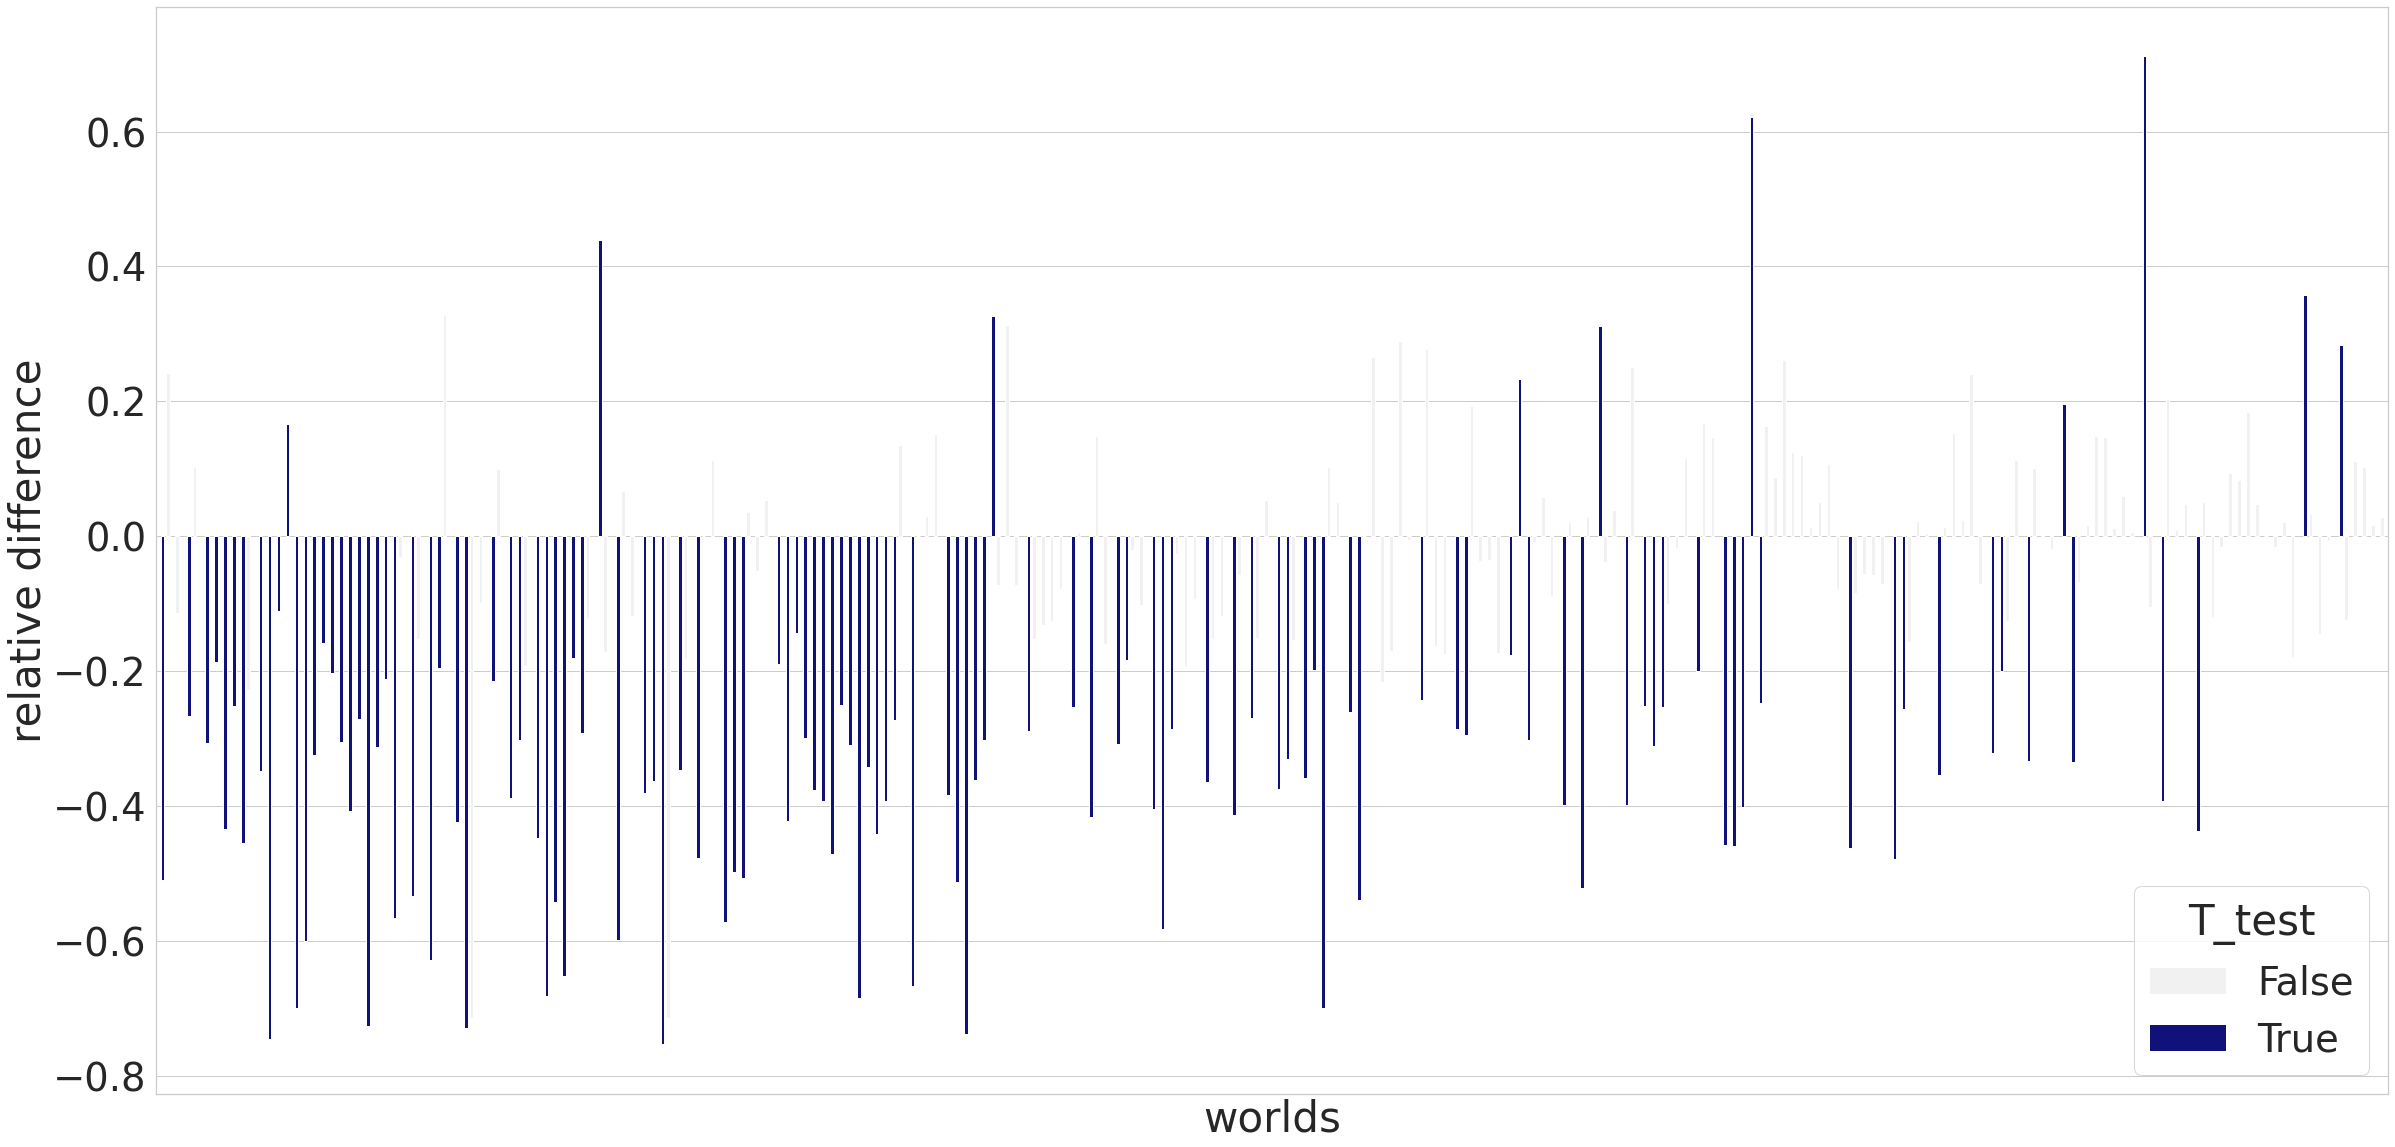

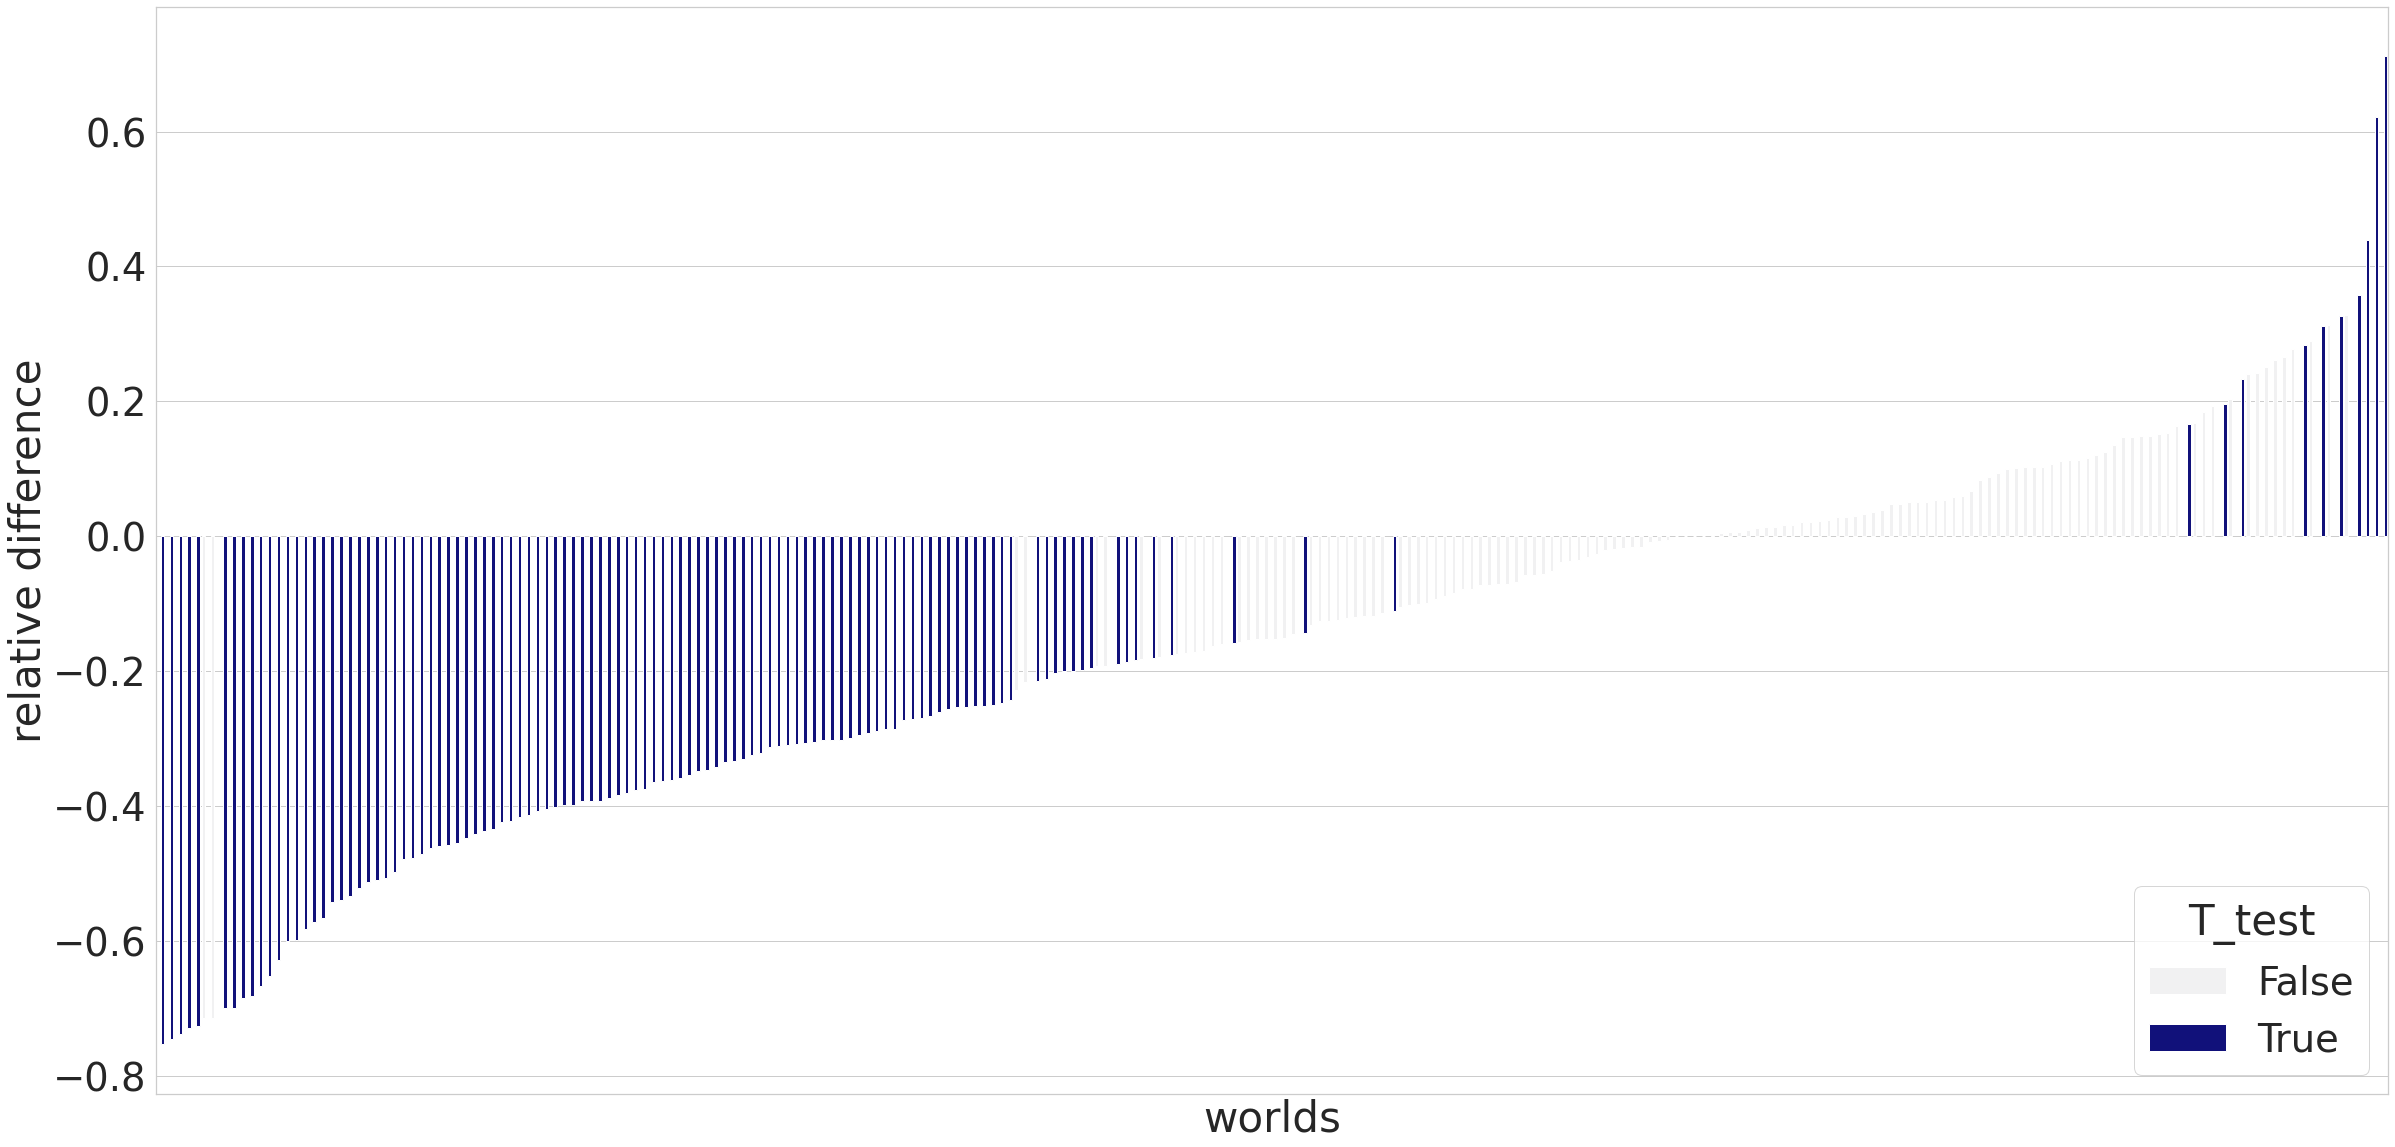

In [242]:
default_result_path = 'default_train.txt'
pretrain_result_path = 'TD3_testbed_2020_10_25_09_23_p15_t20_train.json'

policy_result = load_test_result(pretrain_result_path)
default_result = parse_test_result(default_result_path)

bar_plot(policy_result, default_result, (40, 20))

average:	 ep_return: -26.93	 ep_length: 25.08	 succeed: 0.8927
average:	 ep_return: 10.42	 ep_length: 30.34	 succeed: 0.9280


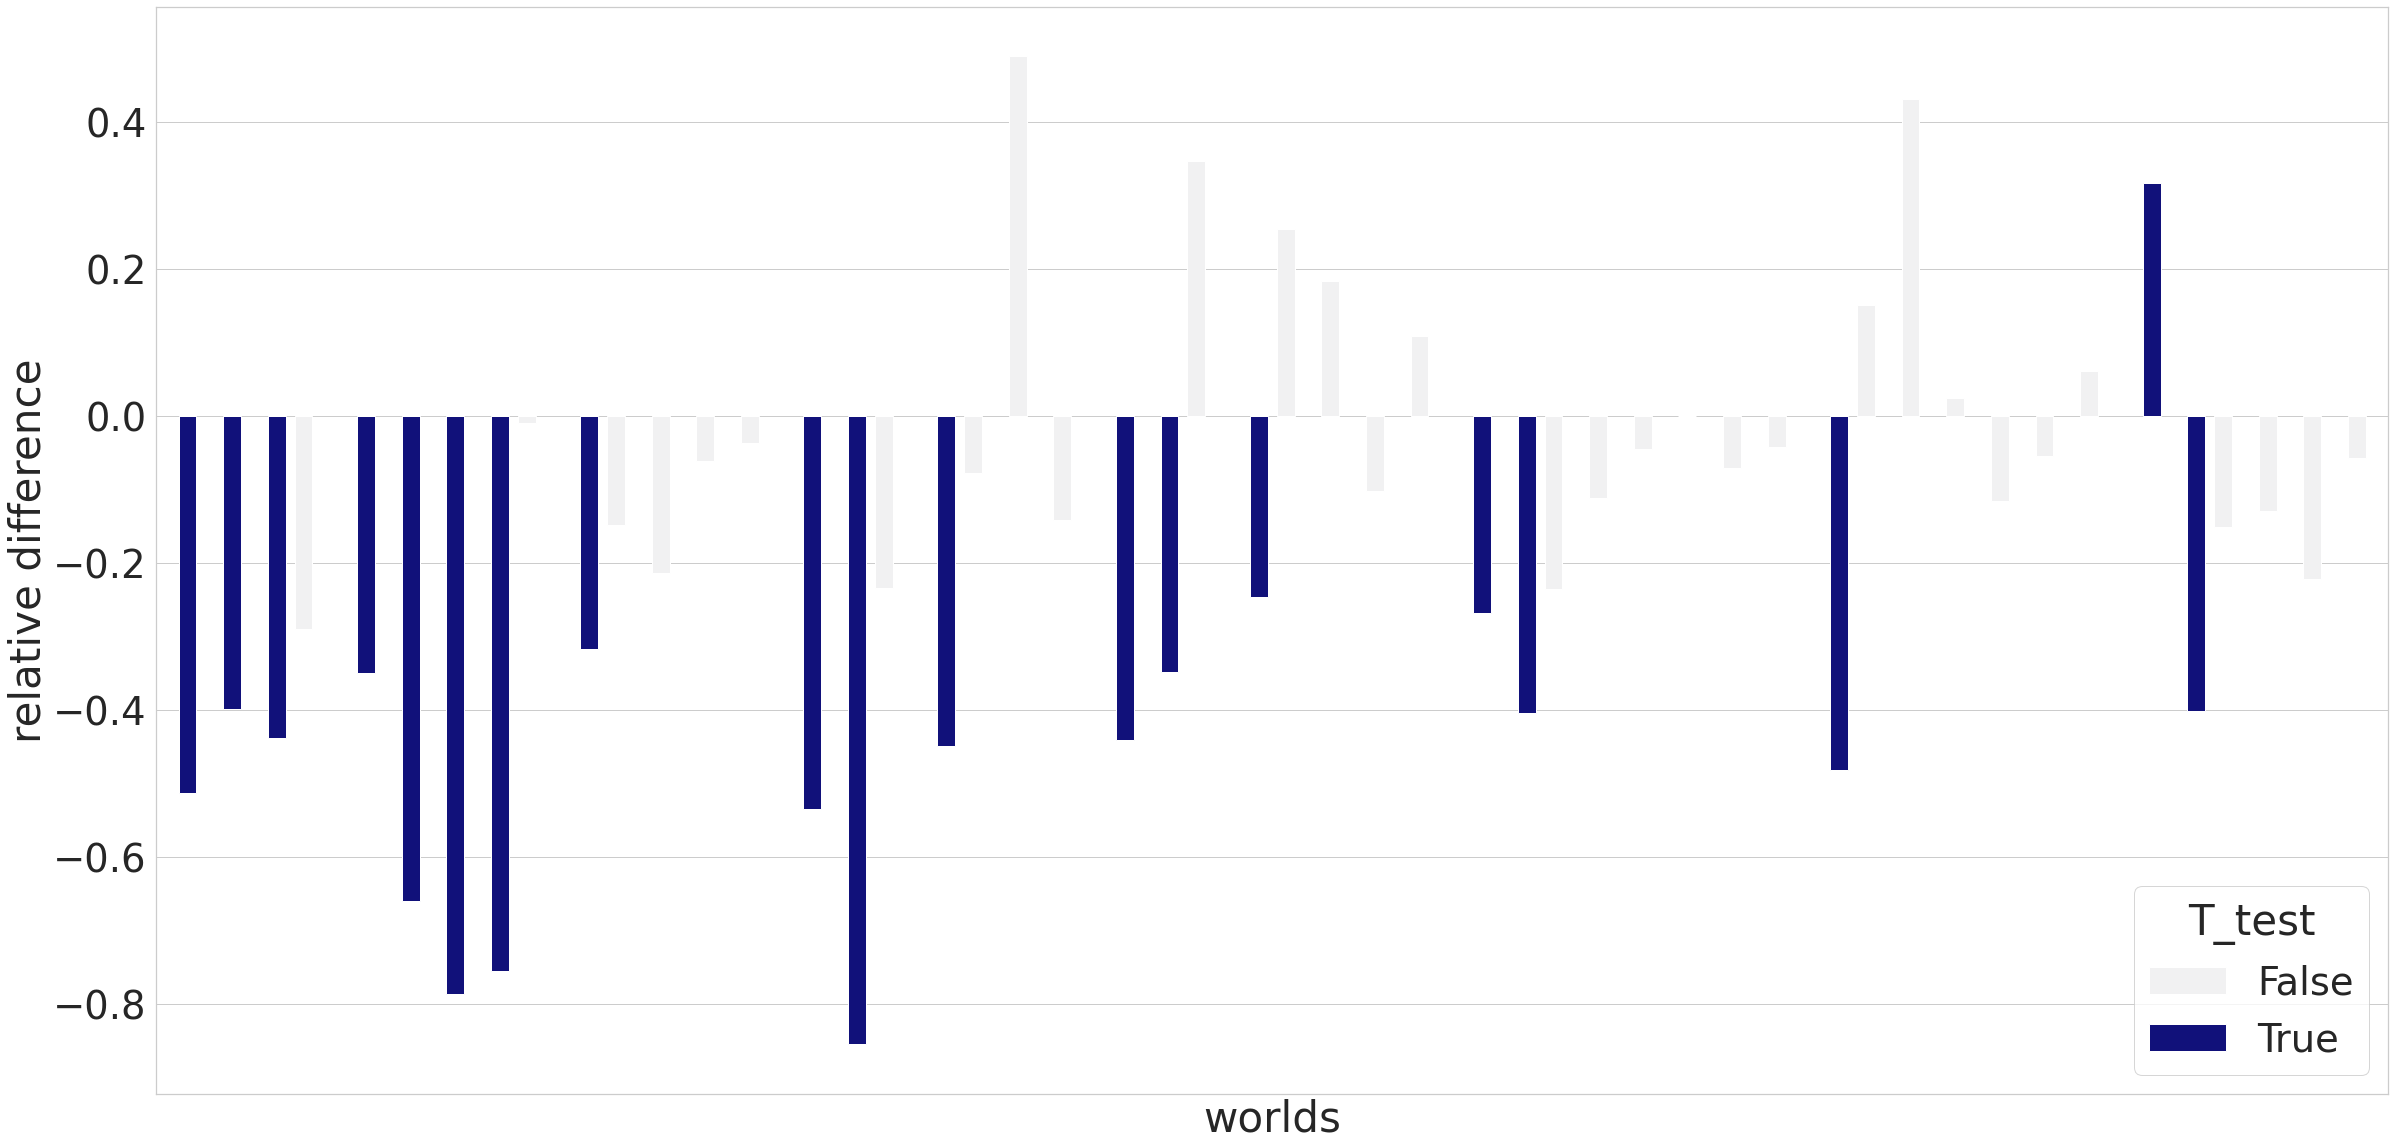

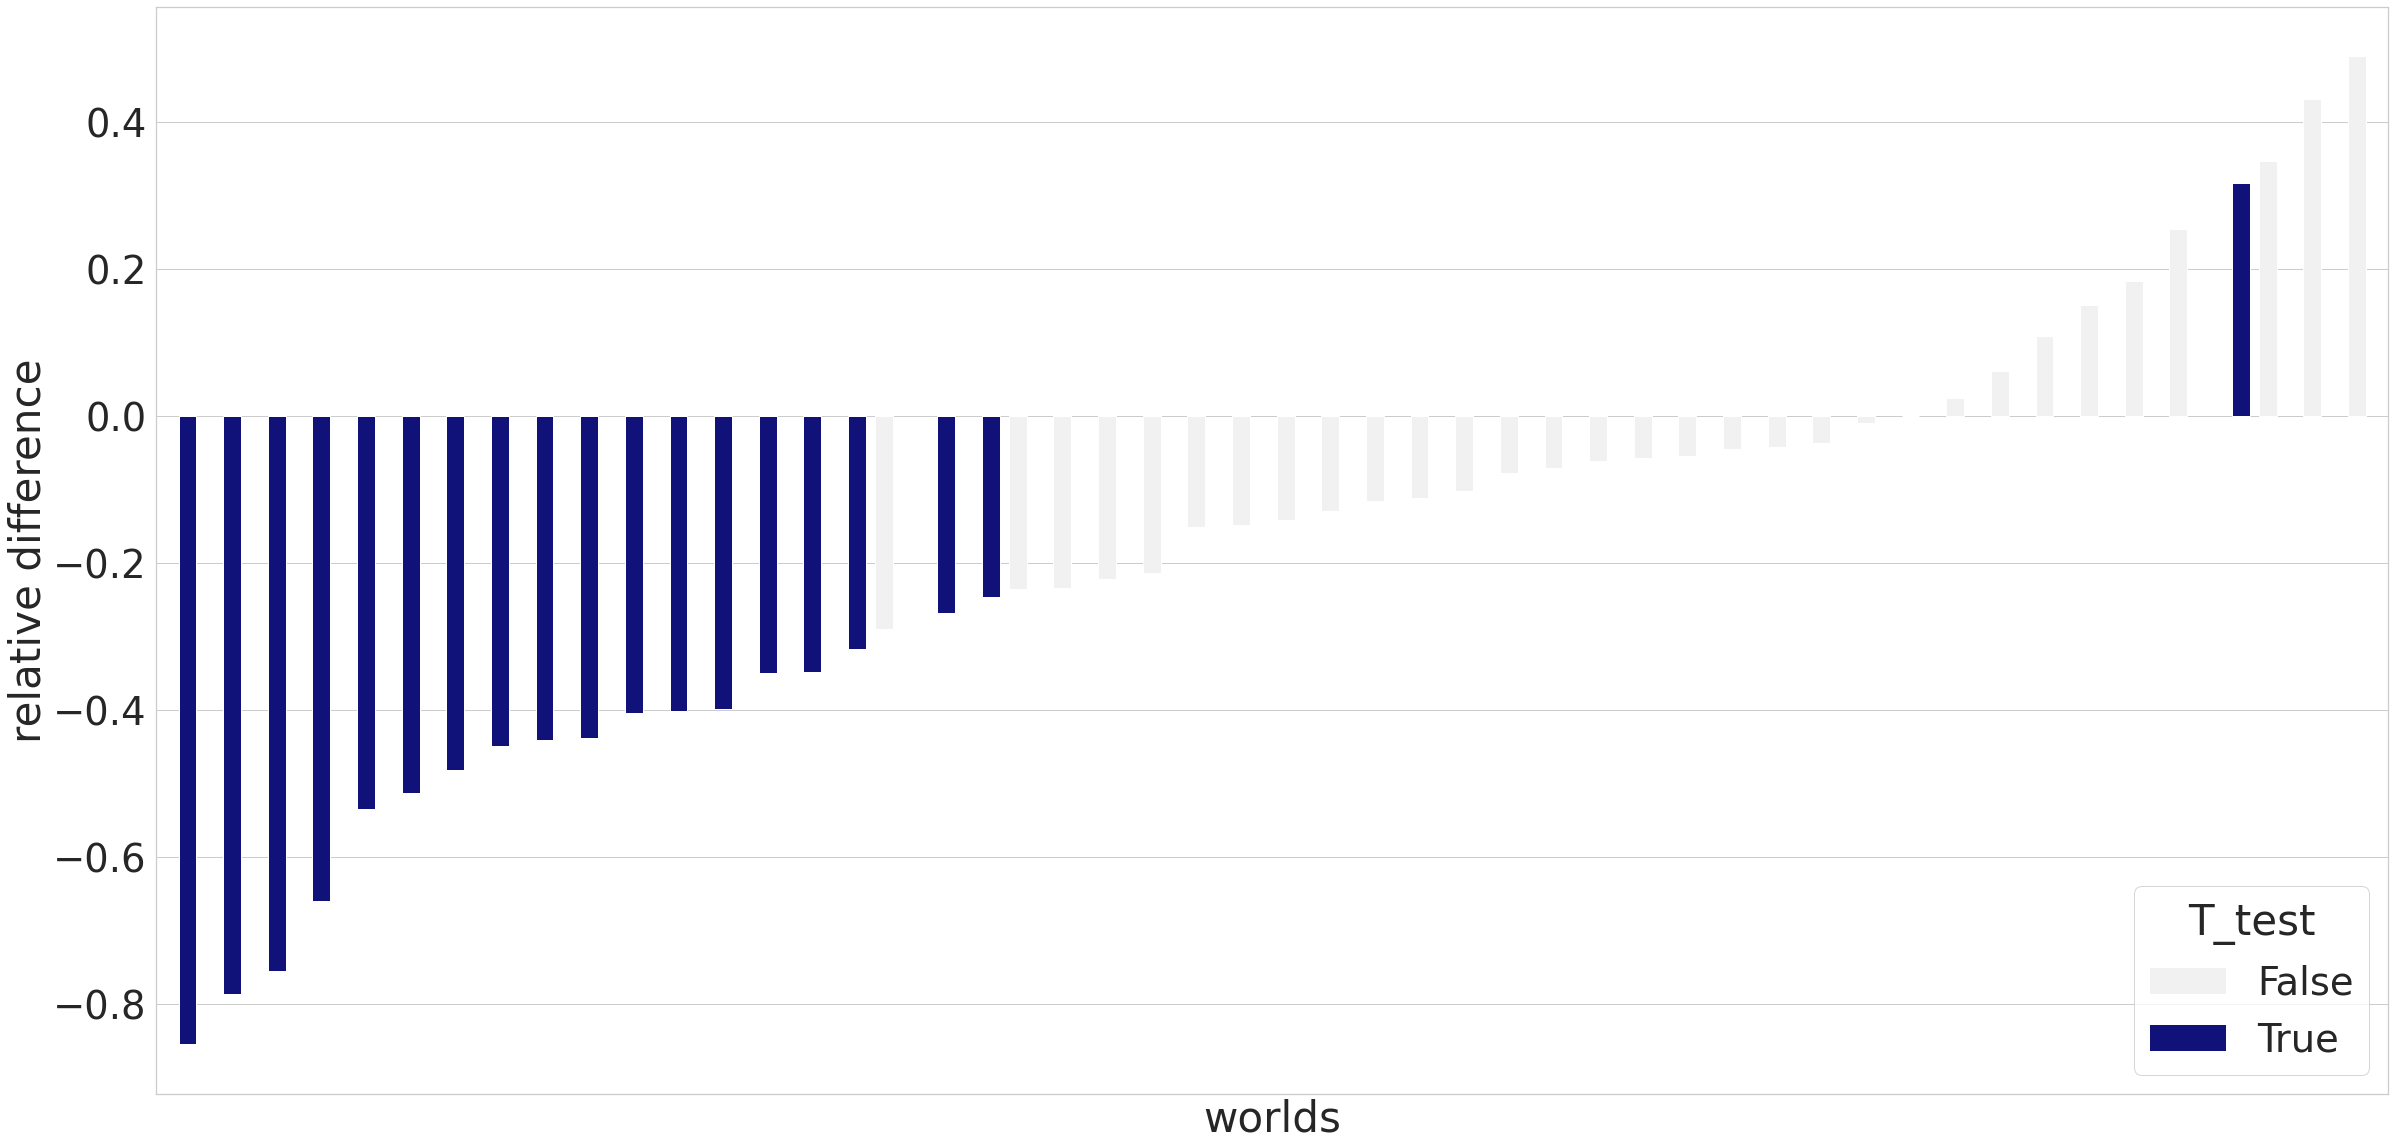

In [247]:
default_result_path = 'default_test.txt'
pretrain_result_path = 'TD3_testbed_2020_10_25_09_23_p15_t20_test.json'

policy_result = load_test_result(pretrain_result_path)
default_result = parse_test_result(default_result_path)

bar_plot(policy_result, default_result, (40, 20))

# T-test

In [248]:
import csv
import os
import json
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

# policy_result_path = '../sac/results/SAC_2020_12_20_21_20/test_result.txt'
default_result_path = 'default_train.txt'

# sac = parse_test_result(policy_result_path)
default = parse_test_result(default_result_path)

pretrain_result_path = 'TD3_testbed_2020_10_25_09_23_p15_t20_train.json'

sac = load_test_result(pretrain_result_path)

def transform_results(results):
    for w in results.keys():
        results[w] = np.array(results[w]["ep_length"])
    return results

performance_train = {"sac": transform_results(sac), "default": transform_results(default)}

# policy_result_path = '../sac/results/SAC_2020_12_20_21_20/test.txt'
default_result_path = 'default_test.txt'

# sac = parse_test_result(policy_result_path)
default = parse_test_result(default_result_path)

pretrain_result_path = 'TD3_testbed_2020_10_25_09_23_p15_t20_test.json'

sac = load_test_result(pretrain_result_path)

performance_test = {"sac": transform_results(sac), "default": transform_results(default)}

In [249]:
train_worlds, test_worlds = [], []
for i in range(300):
    world = "world_{}".format(i)
    if all([world in performance for performance in performance_train.values()]):
        train_worlds.append(world)
    if all([world in performance for performance in performance_test.values()]):
        test_worlds.append(world)
bad_worlds = []
alpha = 0.05
n_train_method, n_test_method = len(performance_train), len(performance_test)
t_test_train_table = np.zeros((n_train_method, n_train_method))
t_test_test_table = np.zeros((n_test_method, n_test_method))
for i, (table, performance_dict, worlds) in enumerate([[t_test_train_table, performance_train, train_worlds],
                                                       [t_test_test_table, performance_test, test_worlds]]):
    methods = list(performance_dict.keys())
    print("train" if i == 0 else "test")
    for j, method1 in enumerate(methods):
        performance1 = performance_dict[method1]
        for k, method2 in enumerate(methods[j + 1:]):
            k = j + k + 1
            performance2 = performance_dict[method2]
            for world in worlds:
                mean1, var1, len1 = np.mean(performance1[world]), np.var(performance1[world]), len(performance1[world])
                mean2, var2, len2 = np.mean(performance2[world]), np.var(performance2[world]), len(performance2[world])
                if mean1 > mean2:
                    bad_worlds.append(int(world.split("_")[-1]))
                if var1 == 0 and var2 == 0:
                    continue
                if len1 == 1 or len2 == 1:
                    continue
                t_value = (mean1 - mean2) / np.sqrt(var1 / len1 + var2 / len2)
                dof = (var1 / len1 + var2 / len2) ** 2 / ((var1 / len1) ** 2 / (len1 - 1) + (var2 / len2) ** 2 / (len2 - 1))
                t_critical = stats.t.ppf(1 - alpha / 2, dof)
                table[j, k] += t_value > t_critical
                table[k, j] += t_value < -t_critical

            print(method1, method2, table[j, k] / float(len(worlds)), table[k, j] / float(len(worlds)))

train
sac default 0.04048582995951417 0.44129554655870445
test
sac default 0.02 0.36


In [54]:
for w in bad_worlds[:75]:
    print(w, end=', ')

2, 5, 12, 16, 35, 37, 38, 45, 55, 59, 62, 98, 102, 103, 111, 113, 114, 119, 120, 126, 131, 149, 151, 153, 157, 158, 171, 177, 178, 179, 181, 187, 190, 192, 195, 196, 198, 203, 205, 207, 209, 213, 217, 219, 221, 222, 223, 225, 230, 231, 236, 239, 241, 242, 243, 244, 248, 249, 252, 253, 254, 255, 261, 262, 264, 267, 271, 273, 279, 280, 285, 286, 292, 293, 297, 